In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:

df = pd.read_csv('wine_Tarea4.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Variable objetivo y división Train/Test (80/20)
Usaremos `alcohol` como variable objetivo y el resto como predictores. Dividimos en 80% entrenamiento y 20% prueba.

In [101]:
df = df[(df[df.columns] > 0).all(axis=1)]

X = df.drop(columns=["alcohol"])
y = df["alcohol"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
residuos = y_train - y_pred

print(f"y = {lr.intercept_} + X*coef")

y = 545.1139882925336 + X*coef


In [102]:
X_train_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_sm).fit()
ols_summary_1 = ols.summary()
ols_summary_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     154.2
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          6.13e-201
Time:                        20:33:59   Log-Likelihood:                -755.87
No. Observations:                 835   AIC:                             1538.
Df Residuals:                     822   BIC:                             1599.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  545.1140     19.197     28.395      0.000     507.432     582.796
fixed acidity            0.5049      0.028     17.774      0.000       0.449       0.561
volatile acidity         0.7405      0.161      4.589      0.000       0.424       1.057
citric acid              0.8544      0.194      4.398      0.000       0.473       1.236
residual sugar           0.2959      0.018     16.375      0.000       0.260       0.331
chlorides               -1.0323      0.536     -1.925      0.055      -2.085       0.020
free sulfur dioxide     -0.0051      0.003     -1.769      0.077      -0.011       0.001
total sulfur dioxide    -0.0015      0.001     -1.662      0.097      -0.003       0.000
density               -556.6892     19.623    -28.369      0.000    -595.207    -518.171
pH                       3.8785      0.220     17.664      0.000       3.448       4.310
sulphates                0.9572      0.158      6.064      0.000       0.647       1.267
quality                  0.2308      0.031      7.409      0.000       0.170       0.292
Id                       0.0001   5.07e-05      2.531      0.012    2.88e-05       0.000
==============================================================================
Omnibus:                       51.813   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.812
Skew:                           0.445   Prob(JB):                     3.14e-20
Kurtosis:                       4.338   Cond. No.                     1.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
# Valores ajustados (fitted) y residuos (desde OLS)
y_pred_train_sm = ols.predict(X_train_sm)
residuos_sm = y_train - y_pred_train_sm

print('Primeros fitted (OLS):', list(y_pred_train_sm.head()))
print('Primeros residuos (OLS):', list(residuos_sm.head()))

Primeros fitted (OLS): [11.622690609639434, 10.36867906462259, 11.472686014548781, 9.751278265808727, 8.757959202637677]
Primeros residuos (OLS): [0.8773093903605655, 0.43132093537741056, 1.3273139854512195, -0.7512782658087271, -0.2579592026376769]


## Diagnóstico de residuos: Independencia, Homocedasticidad, Normalidad y Multicolinealidad


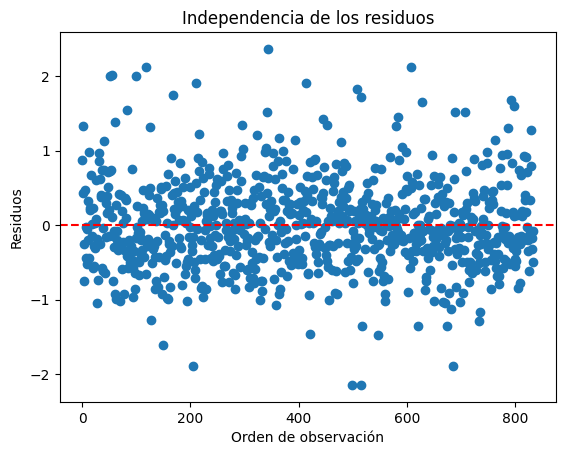

In [104]:
# Independencia (residuos vs orden de observación)
plt.scatter(range(len(residuos_sm)), residuos_sm)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Orden de observación")
plt.ylabel("Residuos")
plt.title("Independencia de los residuos")
plt.show()

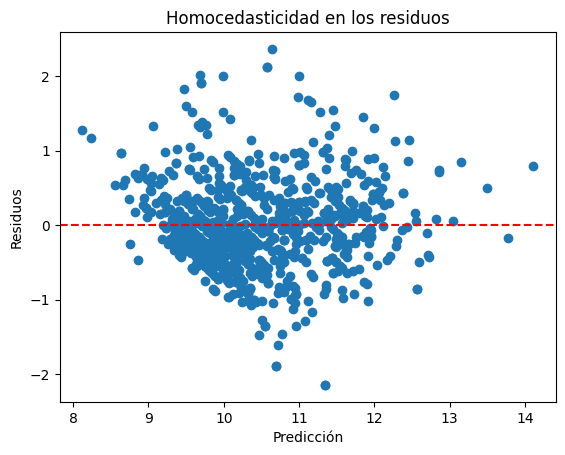

In [105]:
# Homocedasticidad (residuos vs predicción)
plt.scatter(y_pred_train_sm, residuos_sm)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Homocedasticidad en los residuos")
plt.show()

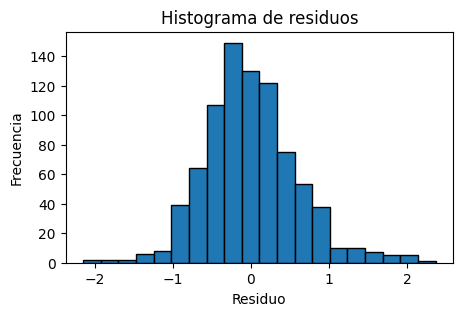

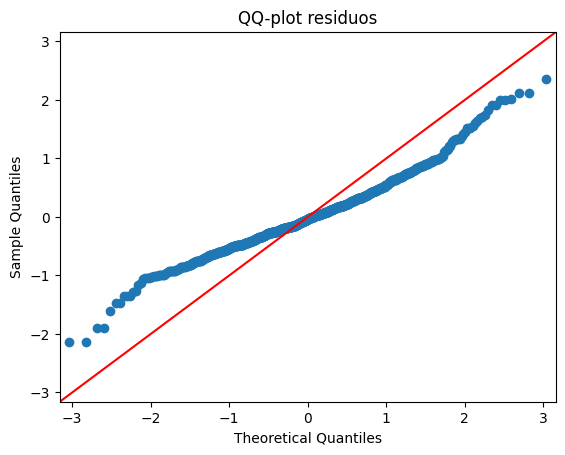

In [106]:
# Normalidad 
plt.figure(figsize=(5,3))
plt.hist(residuos_sm, bins=20, edgecolor='black')
plt.title('Histograma de residuos')
plt.xlabel('Residuo')
plt.ylabel('Frecuencia')
plt.show()

fig = sm.qqplot(residuos_sm, line ='45')
plt.title('QQ-plot residuos')
plt.show()

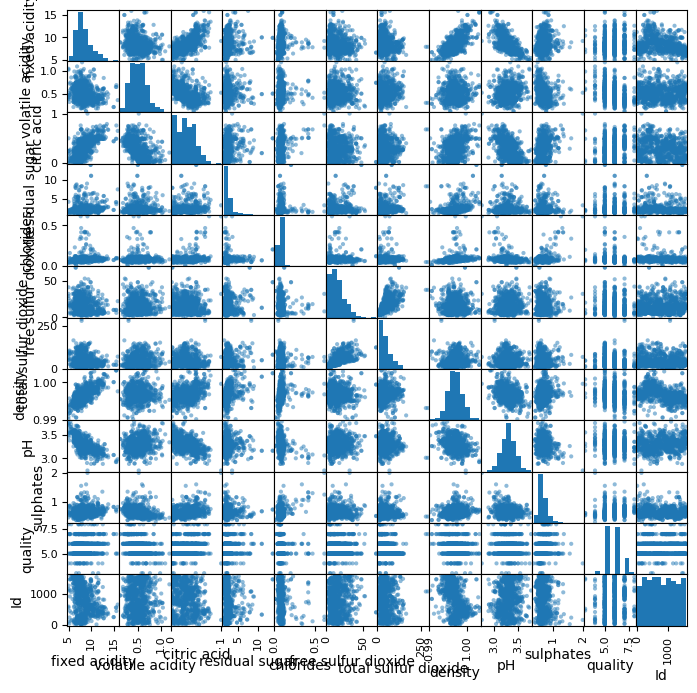

,Variable,VIF
0,const,846357.358352
1,fixed acidity,5.849176
2,volatile acidity,1.746741
3,citric acid,3.020414
4,residual sugar,1.324328
5,chlorides,1.756771
6,free sulfur dioxide,1.961403
7,total sulfur dioxide,2.264474
8,density,3.282930
9,pH,2.483462


In [107]:
# Multicolinealidad 
pd.plotting.scatter_matrix(X_train, figsize=(8, 8))
plt.show()

X_vif_const = sm.add_constant(X_train)
vif_df = pd.DataFrame()
vif_df['Variable'] = X_vif_const.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]
vif_df

# Confiabilidad de los resultados 

Se considera que la inferencia es razonablemente confiable.
- En el gráfico de residuos versus el índice no se aprecia un patrón sistemático (no se observan ondas ni tendencia marcada), por lo que se asume independencia de forma simple.
- En el gráfico de residuos versus predicción no se distingue una forma de “cono” ni una variación de la dispersión claramente creciente o decreciente; la variabilidad de los residuos luce relativamente homogénea, lo que respalda la homocedasticidad.
- El histograma de residuos es aproximadamente simétrico y recuerda a una forma de campana; aunque no sea perfecto, resulta lo bastante cercano para utilizar la inferencia clásica con prudencia.
- En la inspección de correlaciones entre predictores (y el SPLOM), no se identifican correlaciones extremas generalizadas que sugerirían multicolinealidad severa. Esto favorece la estabilidad de los coeficientes y la interpretación de los valores-p.
En conjunto, estos elementos permiten sostener que los supuestos básicos se cumplen de manera razonable y que los p-values y errores estándar reportados por el OLS son utilizables para interpretar el efecto de los predictores sobre la variable objetivo.

## Significancia de variables (alpha = 0.05)


In [108]:
# 2do Ajuste: selección por p-value del primer modelo
pvalues = ols.pvalues.drop('const', errors='ignore')
cols_signif = pvalues[pvalues <= 0.05].index.tolist()
cols_nonsignif = pvalues[pvalues > 0.05].index.tolist()

print('No significativas (p > 0.05):', cols_nonsignif)
print('Significativas (p <= 0.05):', cols_signif)

X_train_sig = X_train[cols_signif]
X_train_sig_sm = sm.add_constant(X_train_sig)
ols_sig = sm.OLS(y_train, X_train_sig_sm).fit()
ols_sig.summary()

No significativas (p > 0.05): ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide']
Significativas (p <= 0.05): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'sulphates', 'quality', 'Id']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     199.2
Date:                Thu, 02 Oct 2025   Prob (F-statistic):          4.77e-200
Time:                        20:34:03   Log-Likelihood:                -766.00
No. Observations:                 835   AIC:                             1552.
Df Residuals:                     825   BIC:                             1599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              553.6271     19.057     29.051      0.000     516.221     591.033
fixed acidity        0.5438      0.026     21.043      0.000       0.493       0.595
volatile acidity     0.6541      0.157      4.159      0.000       0.345       0.963
citric acid          0.6696      0.183      3.655      0.000       0.310       1.029
residual sugar       0.2826      0.018     15.902      0.000       0.248       0.318
density           -566.4028     19.412    -29.178      0.000    -604.506    -528.300
pH                   4.0807      0.203     20.143      0.000       3.683       4.478
sulphates            0.8232      0.143      5.741      0.000       0.542       1.105
quality              0.2558      0.031      8.316      0.000       0.195       0.316
Id                   0.0001   5.01e-05      2.793      0.005    4.16e-05       0.000
==============================================================================
Omnibus:                       48.043   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.979
Skew:                           0.410   Prob(JB):                     3.52e-19
Kurtosis:                       4.330   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# Comparación de coeficientes y errores estándar (modelo original vs reducido)
comp = pd.DataFrame({
    'coef_original': ols.params,
    'std_err_original': ols.bse
})

comp_sig = pd.DataFrame({
    'coef_reducido': ols_sig.params,
    'std_err_reducido': ols_sig.bse
})

comp_total = comp.join(comp_sig, how='outer')
comp_total

,coef_original,std_err_original,coef_reducido,std_err_reducido
Id,0.000128,0.000051,0.000140,0.000050
chlorides,-1.032264,0.536103,NaN,NaN
citric acid,0.854397,0.194248,0.669594,0.183221
const,545.113988,19.197478,553.627074,19.057156
density,-556.689227,19.623349,-566.402774,19.412064
fixed acidity,0.504887,0.028405,0.543823,0.025843
free sulfur dioxide,-0.005107,0.002887,NaN,NaN
pH,3.878518,0.219577,4.080679,0.202581
quality,0.230790,0.031149,0.255805,0.030760
residual sugar,0.295938,0.018073,0.282645,0.017774


## Efecto de eliminar variables no significativas en la interpretación y los valores-p
- Al retirar predictores no significativos (según el primer ajuste OLS con α = 0.05), el modelo se simplifica y la lectura de los coeficientes restantes se hace más directa, al reducir “ruido” de variables sin evidencia suficiente.
- Suele disminuir la colinealidad entre predictores; al reducirse la multicolinealidad, los errores estándar de los coeficientes tienden a no inflarse e incluso a reducirse, y los valores‑p de las variables que permanecen se vuelven más estables.
- En el 2º ajuste (modelo reducido), por construcción se conservan las variables con mayor soporte estadístico. Al comparar los resúmenes y la tabla de coeficientes/errores estándar, se verifica que los predictores retenidos mantienen significancia y una interpretación más clara, sin aumentos preocupantes de la incertidumbre.
- Como precaución general, si se eliminara una variable que actuara como confusora, podría introducirse sesgo en los coeficientes restantes. Por ello, la depuración por significancia debe ir acompañada de una revisión conceptual del problema y de los supuestos (gráficos de residuos y correlaciones) para asegurar que la interpretación siga siendo válida. En el trabajo actual, el flujo de revisión y la comparación entre modelos apoyan que la eliminación realizada mejora la interpretabilidad sin deteriorar la confiabilidad de los valores‑p que permanecen.